## Business Understanding  

### Overview 

SyriaTel, a telecommunications provider offers mobile voice, data, SMS and roaming services. As the market leader in a competitive landscape, the company is focuded on network reliability and innovative digital services. Operating in a challenging economic and geopolitical environment the company prioritizes customer retention to maintain its dominant market position.

### Problem Statement 

Customer churn reduces revenue, increases acquistion costs, loss of market share to competitors and damaged brand reputation. High churn rates indicate potential issues with customer satisfication, network quality or pricing strategies. This project aims to predict customer churn using a binary classification model. 

  
### Objectives 
* Analyze key drivers of churn using feature importance to understand customer behavior.
* Generate interpretable insights into why customers leave.  
* Provide actionable recommendations for retention strategies. 
  
### Metrics of Success 
1. The project will be a success if we can identify the factors that contribute to churn.
2. Achieve an Accuracy of above 75% and have a Recall of above 70%. 


## Data Understanding 

In [1]:
#import libraries
#data manipulation libraries
import pandas as pd 
import numpy as np

#visualization libraries
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#preprocessing and scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#model selection, hyperparameter tuning, cross-validation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score    

#handling imbalanced data
from imblearn.over_sampling import SMOTE, SMOTEN

#random distributions for hyperparameter tuning
from scipy.stats import randint, uniform

#model evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, recall_score, make_scorer

#machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#pipelines
from imblearn.pipeline import Pipeline

#suppress warnings
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
#load the dataset
st_df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
#preview the first 5 rows
st_df.head() 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#check shape
print(f"The dataset has {st_df.shape[0]} rows and {st_df.shape[1]} columns.")

The dataset has 3333 rows and 21 columns.


In [4]:
#info
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset comprises 16 numerical and 5 categorical columns.

#### Dataset Column Descriptions

1. **state**

* U.S. state where the customer resides.

2. **account length**

* Number of days the customer has had an account.

3. **area code**

* Area code of the customer’s phone number.


4. **international plan**

 * Whether the customer subscribes to an international calling plan(yes/no).


5. **voice mail plan**

* Whether the customer subscribes to a voice mail plan(yes/no).


6. **number vmail messages** 

 * Number of voice mail messages.

7. **total day minutes**

 * Total number of minutes customer used the phone during the day.

8. **total day calls** 

* Total number of calls during the day. 

9. **total day charge**

* Total amount charged for daytime calls. 

10. **total eve minutes**

* Total evening call minutes.

11. **total eve calls**

* Total number of evening calls.

12. **total eve charge**

* Total amount charged for evening calls.

13. **total night minutes**

* Total night call minutes.

14. **total night calls**

* Total number of night calls.

15. **total night charge** 

* Total amount charged for night calls.

16. **total intl minutes**

* Total international call minutes.

17. **total intl calls**

* Total number of international calls.

18. **total intl charge** 

* Total amount charged for international calls.

19. **customer service calls**

* Number of calls made to customer service.

20. **churn**

* Target variable: whether the customer stopped doing business with SyriaTel.
  
* True = churned, False = stayed.


In [5]:
#statistical summary of numerical column
st_df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


**Observation**:  

***Customer Service Calls*** 
Most customers call once or not at all while a few call 6–9 times  likely due to dissatisfaction.  

***Voicemail Messages***  
Most customers have zero voicemail messages.

***Usage Patterns***  
Customers spend more minutes in the evening but highest charges in the day because day rates are higher.
Call counts are similar  across day/eve/night but charges vary. 

***International Usage***  
Most customers make few international calls, a small group makes many.


In [6]:
#statistical summary for categorical columns 
st_df.describe(include='O').T

,count,unique,top,freq
state,3333,51,WV,106
phone number,3333,3333,382-4657,1
international plan,3333,2,no,3010
voice mail plan,3333,2,no,2411


**Observation**:  

***State*** 
51 unique states, WV (West Virginia) has the highest with 106 customers.

***Phone Number***  
3333 unique values (one per customer).
An identifier, not a feature.

***International Plan***  
Most customers don’t have an international plan.

***Voice Mail Plan***  

Most customers don’t have a voice mail plan.


In [7]:
#check nulls 
st_df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No missing values.

In [8]:
#check duplicates 
st_df.duplicated().sum()

0

No duplicates.

In [9]:
#churned vs. non-churned customers proportion
print(f"Churn proportions:\n{st_df['churn'].value_counts(normalize=True).mul(100).round(2)}%")


Churn proportions:
churn
False    85.51
True     14.49
Name: proportion, dtype: float64%


The dataset shows a strong class imbalance, 85.5% did not churn and only 14.5% churned. 

In [10]:
#correlation check
st_df.corr(numeric_only=True)

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


**Observation**:  

***Customer Service Calls*** has the highest positive correlation with churn.     

***Total Day Minutes and Total Day Charge*** have a moderate positive correlation with churn.    

***Total International Minutes and Total Intl Charge** have a smaller positive correlation with churn.  

***Number of Voicemail Messages*** has a negative correlation with churn.    

***Minutes and Charges for each period (day/eve/night/intl)*** are perfectly correlated.


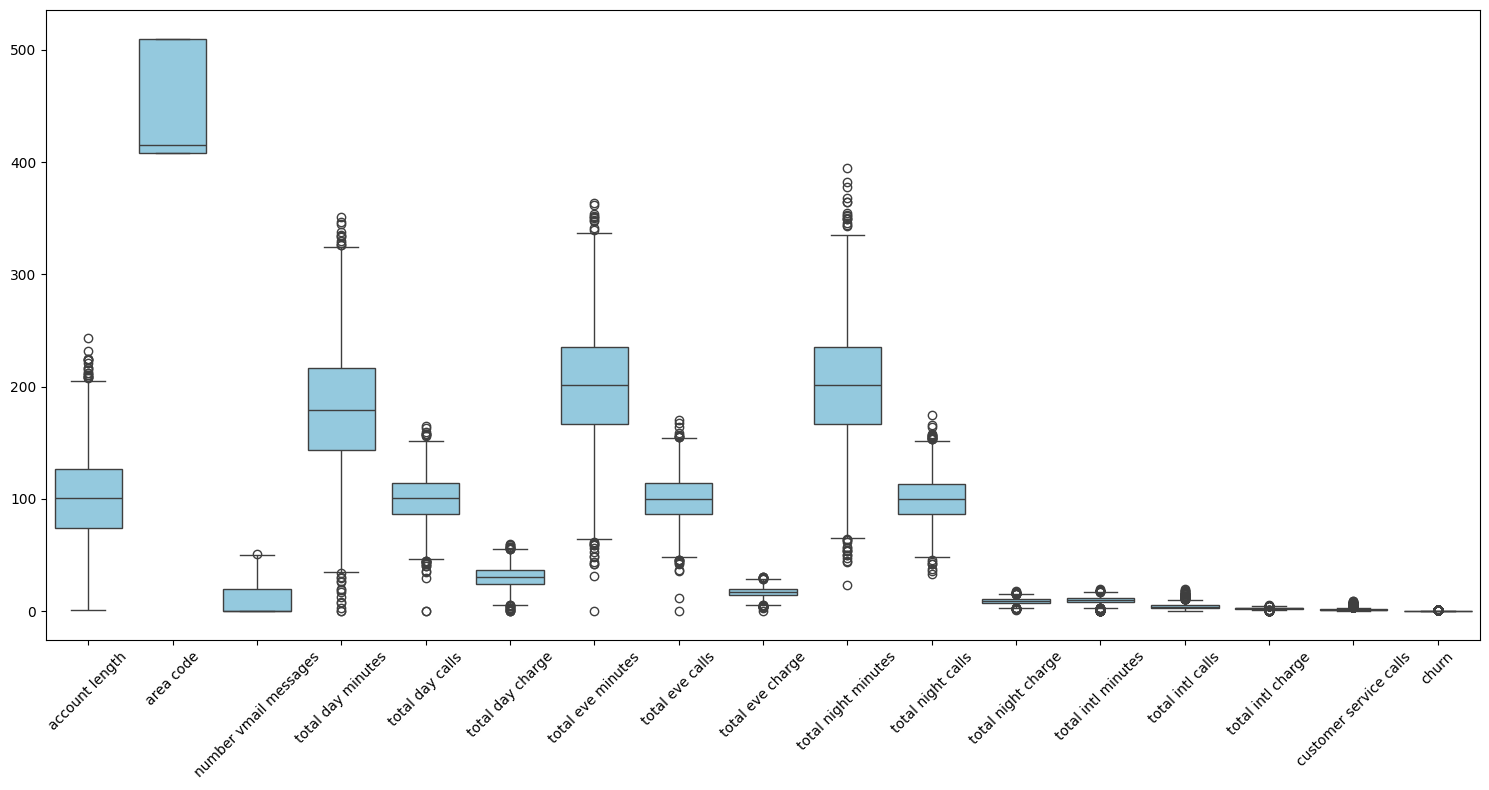

In [11]:
#check for outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=st_df, color="skyblue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();


**Observation**:  
The data shows that several features like total day/eve/night minutes, international minutes/calls and customer service calls have very high outliers representing typical customer behavior. Most customers have low voicemail usage and few customer service calls but a small group has extremely high values. These outliers likely indicate distinct customer segments rather than errors and could be strong signals for churn prediction.  


## Data Preparation

### Data Cleaning

In [12]:
#make a copy 
st_df1 = st_df.copy(deep=True)

In [13]:
#remove phone number column
st_df1 = st_df1.drop(columns=["phone number"])

In [14]:
#convert area code to categorical
st_df1['area code'] = st_df1['area code'].astype('object')

## Exploratory Data Analysis  
This section involves exploring to understanding the dataset's structure to uncover patterns, identify relationships between features and target before applying any modeling techniques. 


### Univariate Analysis  
This involves exploring each feature individually to understand the distribution and skewness.

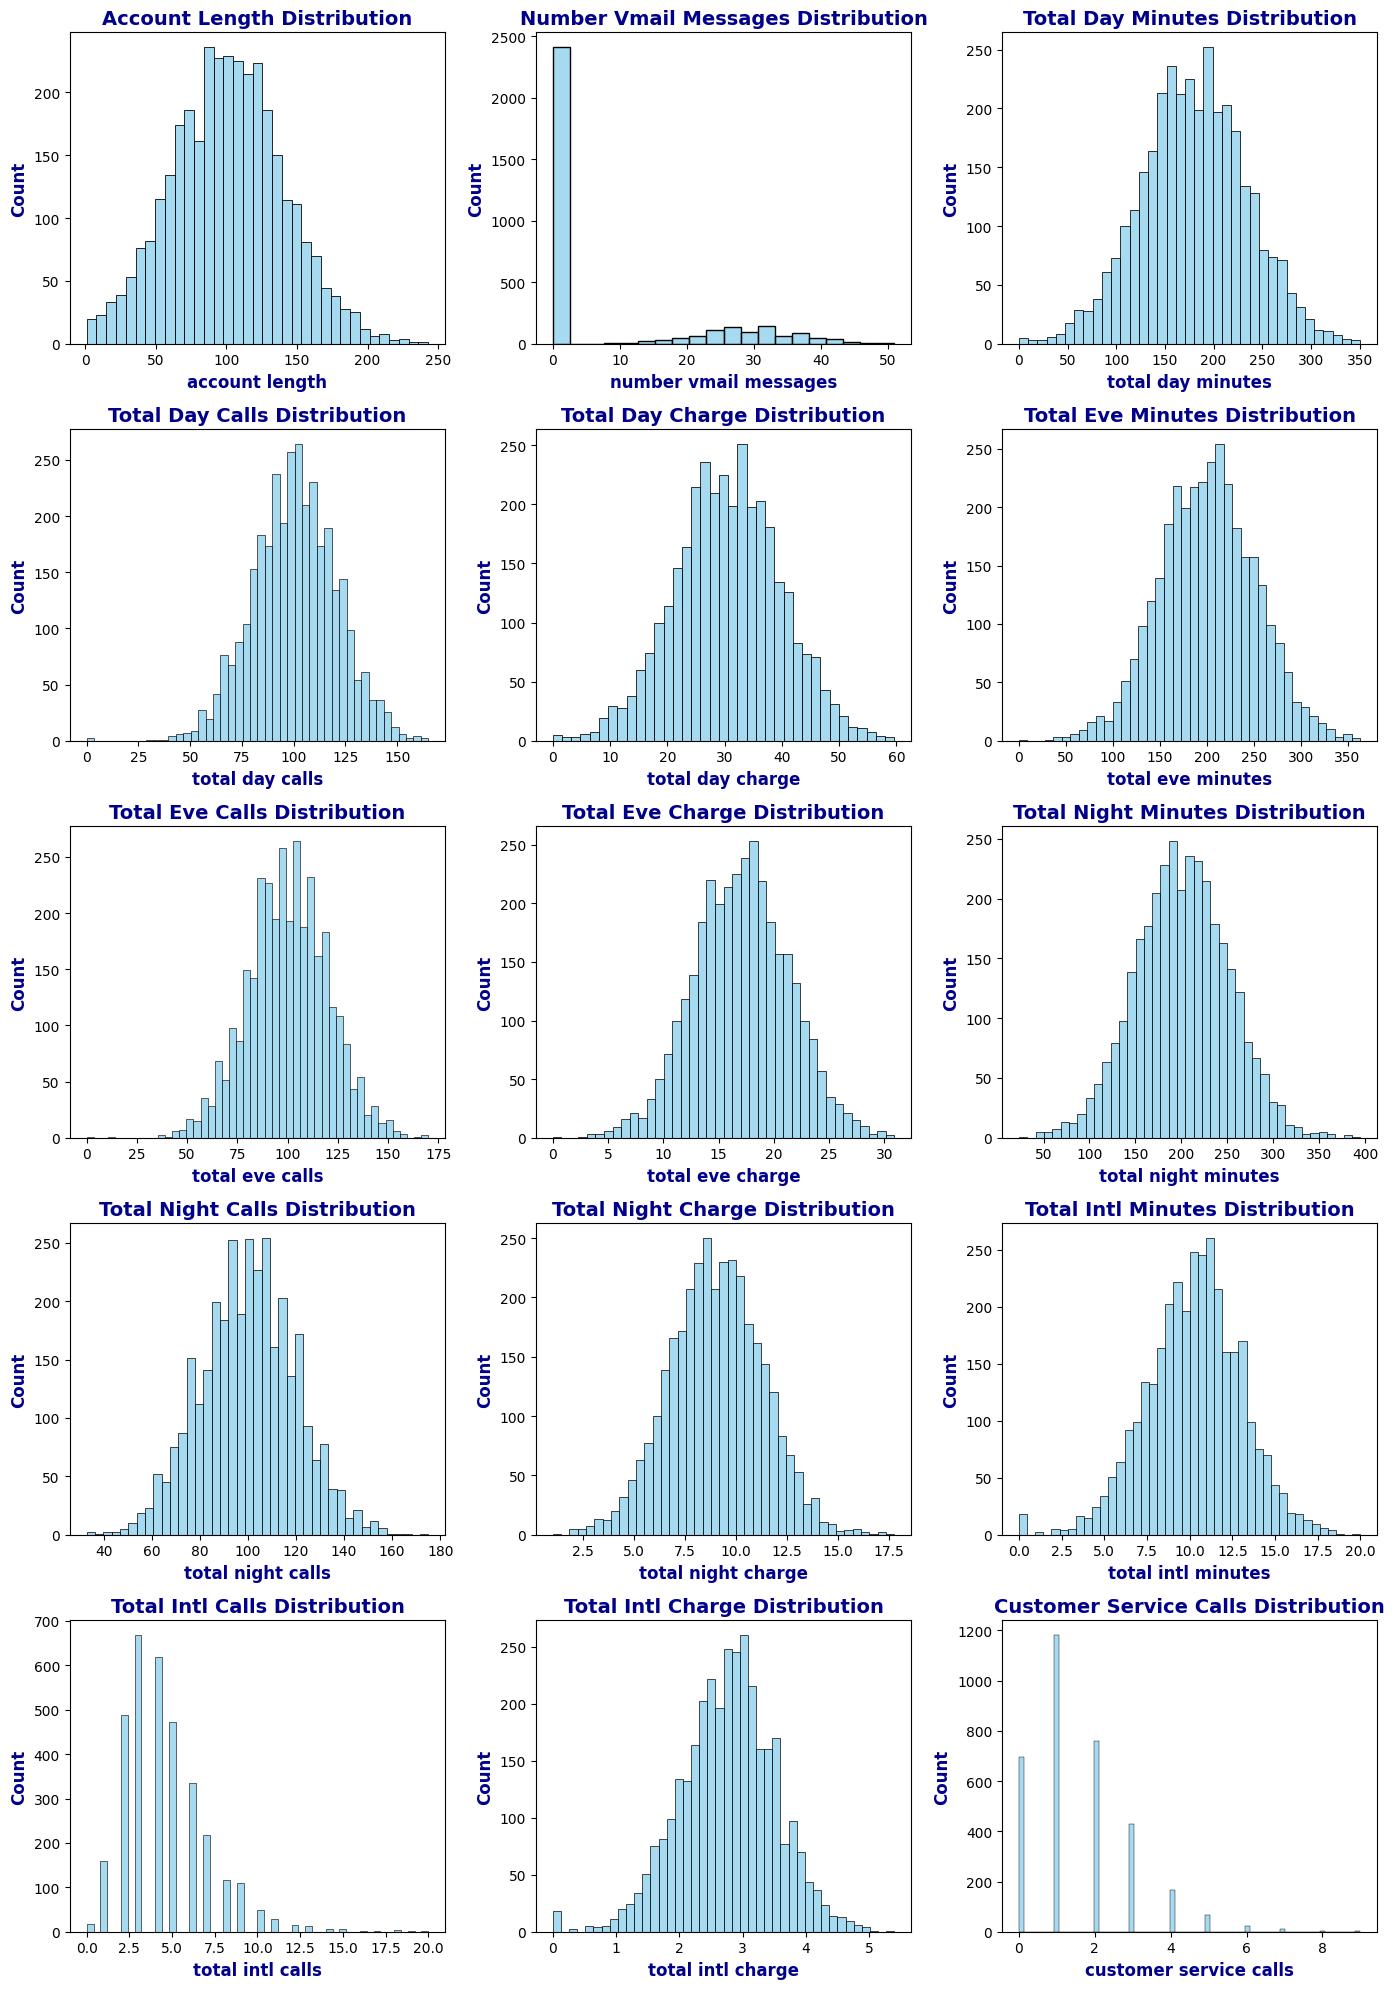

In [15]:
#select only numeric columns
num_coln = st_df1.select_dtypes(include='number').columns

#decide grid size
n_cols = 3
n_rows = (len(num_coln) + n_cols - 1) // n_cols

#create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()  # Flatten to 1D for easy indexing

#loop through numeric columns
for i, col in enumerate(num_coln):
    sns.histplot(st_df1[col], bins='auto', color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12, color='darkblue', fontweight='bold')
    axes[i].set_ylabel("Count", fontsize=12, color='darkblue', fontweight='bold')
    axes[i].set_title(f"{col.title()} Distribution", fontsize=14, color='darkblue', fontweight='bold')

#hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


All of the plots except customer service calls and number of voicemail messages have a normal distribution. 

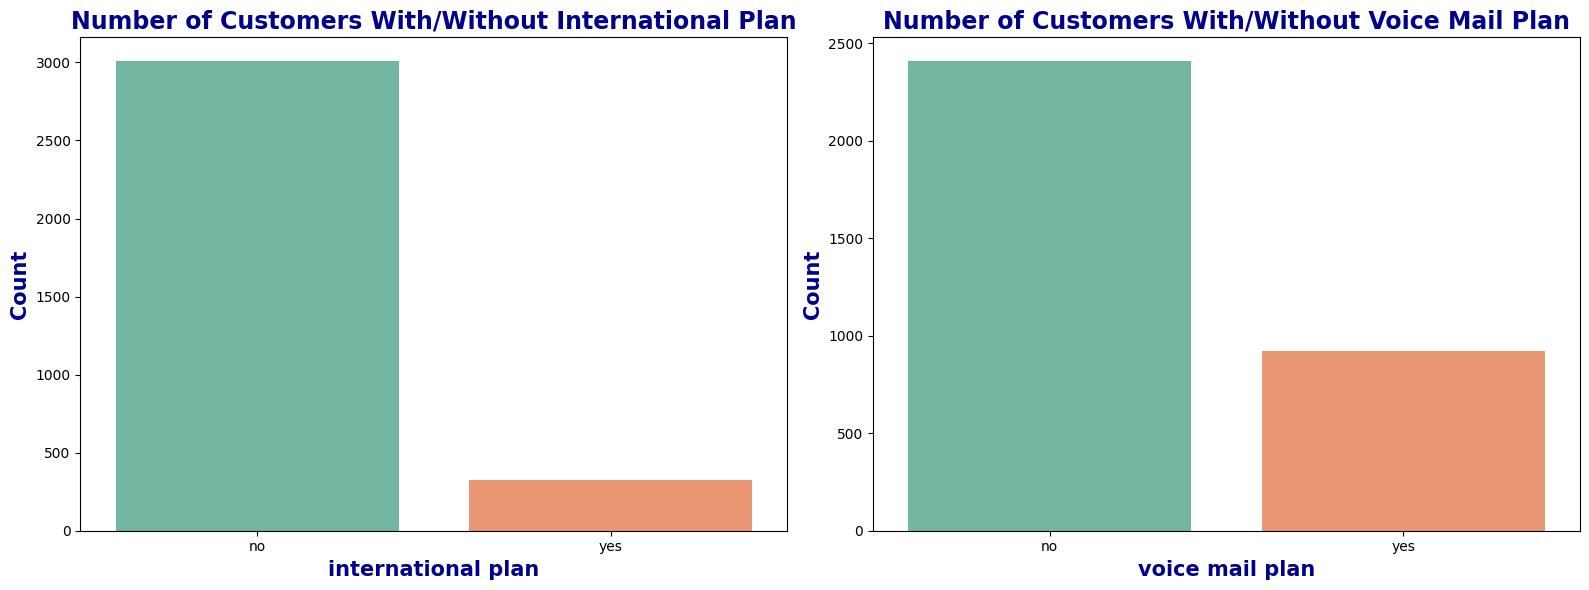

In [16]:
#categorical columns
cat_coln = ["international plan", "voice mail plan"]

#titles for each column
title_map = {
    "international plan": "Number of Customers With/Without International Plan",
    "voice mail plan": "Number of Customers With/Without Voice Mail Plan",
}

#create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#loop through categorical columns and plot side by side
for ax, col in zip(axes, cat_coln):
    # sort categories by frequency descending
    sorted_cat = st_df1[col].value_counts(ascending=False).index

    sns.countplot(data=st_df1, x=col, palette='Set2', order=sorted_cat, ax=ax)
    ax.set_xlabel(col, fontsize=15, color='darkblue', fontweight='bold')
    ax.set_ylabel("Count", fontsize=15, color='darkblue', fontweight='bold')
    ax.set_title(title_map[col], fontsize=17, color='darkblue', fontweight='bold')

plt.tight_layout()
plt.show();

Majority of customers have neither an international plan nor a voice mail plan.

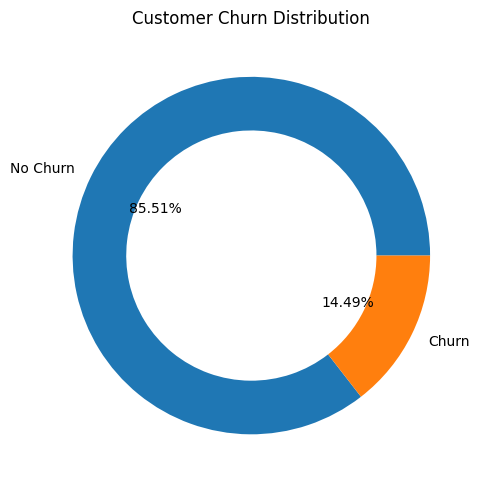

In [17]:
#count the occurences of each churn category
churned_count = st_df1.churn.value_counts(ascending=False)

labels = ["No Churn", "Churn"]

#plot pie chart
plt.figure(figsize=(5,5))
plt.pie(churned_count, labels=labels, autopct="%.2f%%", colors=['#1f77b4','#ff7f0e'], wedgeprops=dict(width=0.3))
plt.title("Customer Churn Distribution")
plt.tight_layout()
plt.show();

There are more customers who did not churn than the ones who churned. There is a class imbalance. 

In [18]:
#grouping states by region
region_map = {
    # Northeast states
    'ME':'Northeast','NH':'Northeast','VT':'Northeast','MA':'Northeast','RI':'Northeast',
    'CT':'Northeast','NY':'Northeast','NJ':'Northeast','PA':'Northeast',

    # Midwest states
    'OH':'Midwest','MI':'Midwest','IN':'Midwest','IL':'Midwest','WI':'Midwest',
    'MN':'Midwest','IA':'Midwest','MO':'Midwest','ND':'Midwest','SD':'Midwest',
    'NE':'Midwest','KS':'Midwest',

    # Southern states
    'DE':'South','MD':'South','DC':'South','VA':'South','WV':'South',
    'NC':'South','SC':'South','GA':'South','FL':'South',
    'KY':'South','TN':'South','MS':'South','AL':'South',
    'OK':'South','TX':'South','AR':'South','LA':'South',

    # Western states
    'ID':'West','MT':'West','WY':'West','NV':'West','UT':'West','CO':'West',
    'AZ':'West','NM':'West','AK':'West','WA':'West','OR':'West','CA':'West','HI':'West'
}
#apply mapping to a new region column
st_df1['region'] =st_df1['state'].map(region_map)
#verify the region column
print(st_df1['region'].value_counts())


region
South        1109
West          831
Midwest       802
Northeast     591
Name: count, dtype: int64


In [19]:
#drop the state column
st_df1 = st_df1.drop("state", axis=1)

#verifying
st_df1.columns 

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'region'],
      dtype='object')

### Bivariate Analysis  
This involves examining the relationships between two variables at a time a predictor variable and the target variable.  

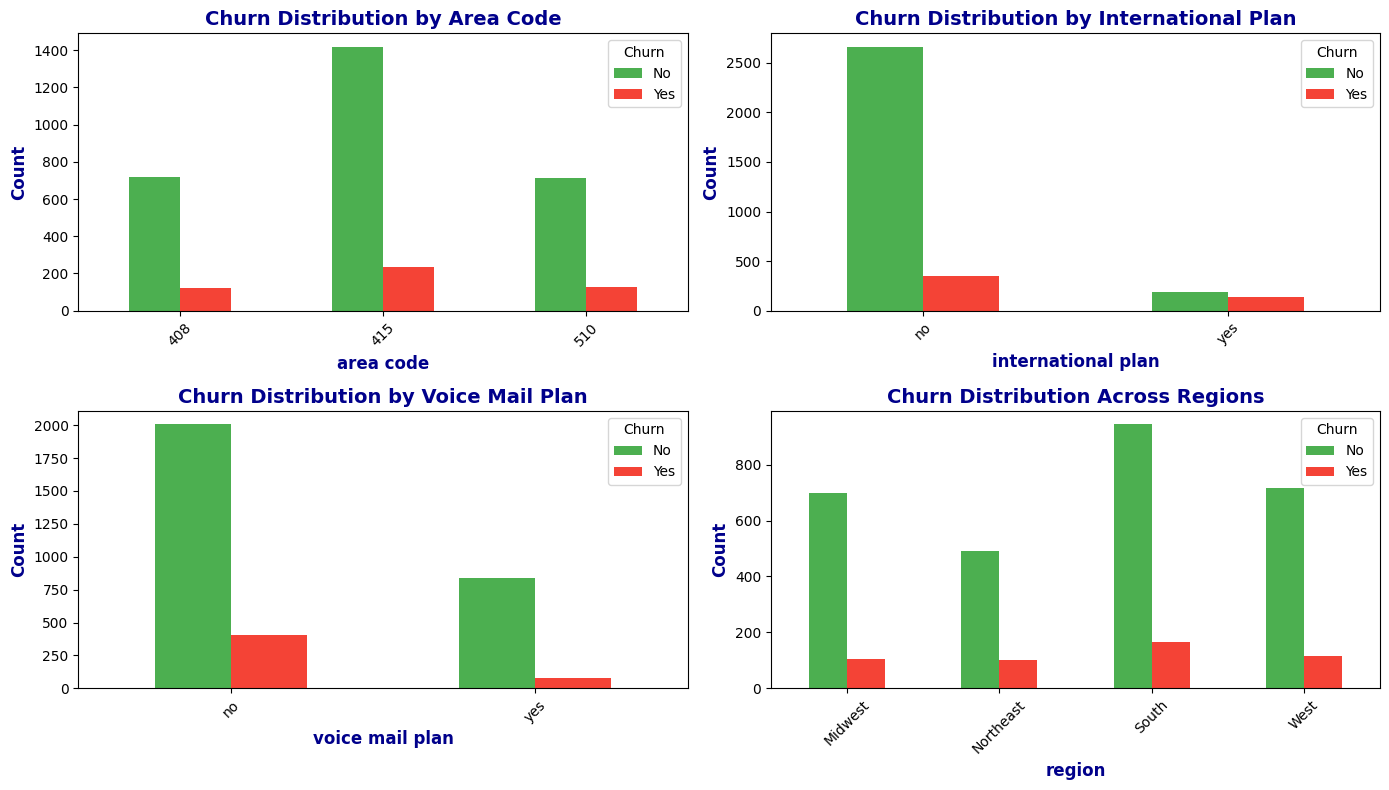

In [20]:
# Select categorical columns
cat_coln = st_df1.select_dtypes(include='object').columns

# Titles mapping
title_map = {
    "international plan": "Churn Distribution by International Plan",
    "voice mail plan": "Churn Distribution by Voice Mail Plan",
    "region": "Churn Distribution Across Regions",
    "area code": "Churn Distribution by Area Code"
}

# Colors for churn = No/Yes
colors = ["#4CAF50", "#F44336"]

# Grid size (2 per row)
n_cols = 2
n_rows = (len(cat_coln) + n_cols - 1) // n_cols

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

# Loop through categorical columns
for i, col in enumerate(cat_coln):
    ct = pd.crosstab(st_df1[col], st_df1["churn"])
    ct.plot(kind='bar', color=colors, ax=axes[i])
    
    axes[i].set_xlabel(col, fontsize=12, color='darkblue', fontweight='bold')
    axes[i].set_ylabel("Count", fontsize=12, color="darkblue", fontweight='bold')
    title = title_map.get(col, f"Churn Distribution by {col.title()}")
    axes[i].set_title(title, fontsize=14, color='darkblue', fontweight='bold')
    axes[i].legend(title="Churn", labels=["No", "Yes"])
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused axes if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Majority of customers who churned are from the South, those with no internatioanal plan and no voice mail plan. 

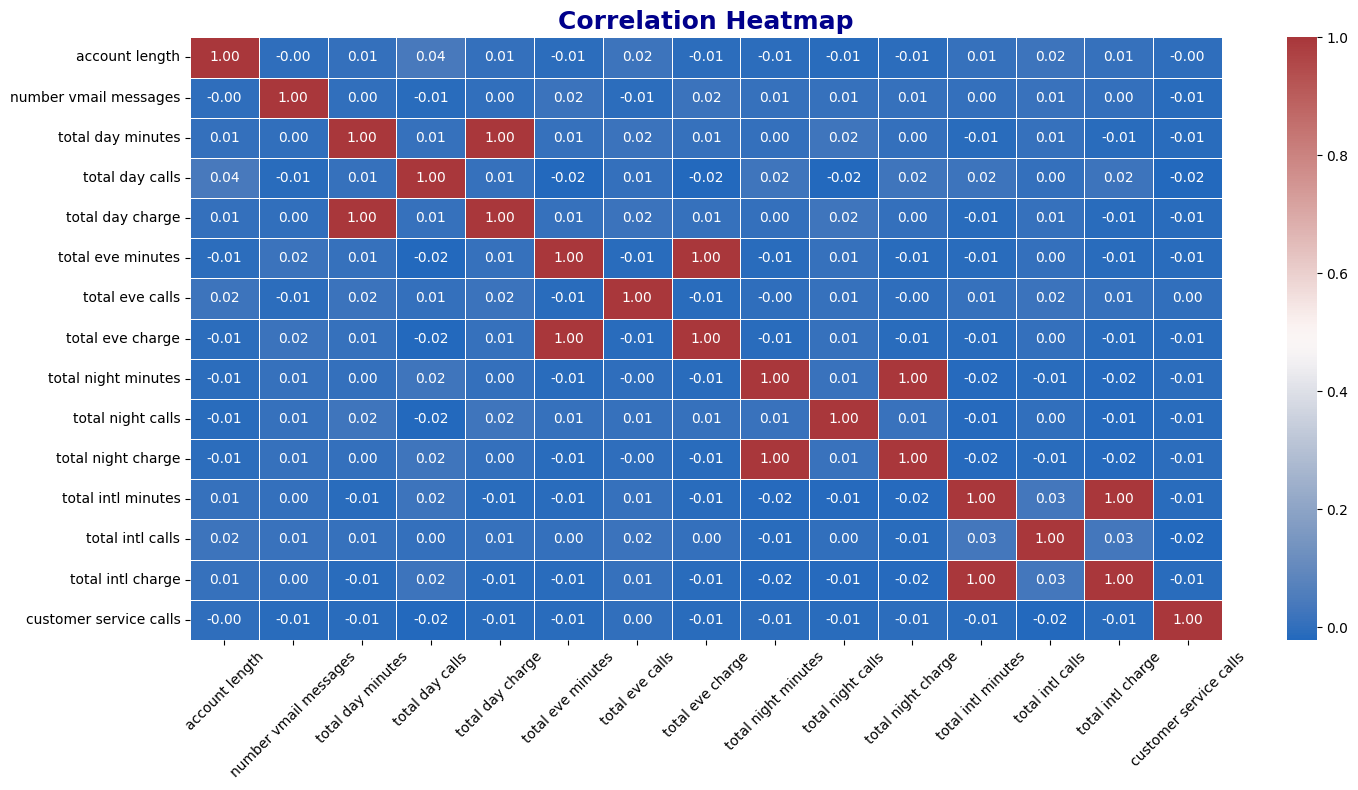

In [21]:
#Plot heatmap
corr = st_df1.select_dtypes("number").corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=18, fontweight='bold', color='darkblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(); 

**Observation**:  
Most of the features are not correlated though some have a perfect correlation.  
This indicates multicollinearity.    
Features with a perfect correlation:   
* Total day charge and total day minutes.    
* Total eve charge and total eve minutes.
* Total night charge and total night minutes.  
* Total int charge and total int minutes.  

### Handling Multicollinearity 

Multicollinearity occurs when two features in a dataset are perfectly correlated. This can cause problems for many machine learning models:

* Unstable model predictions

 * Difficulty in interpreting feature importance

In our dataset some features are perfectly or almost perfectly correlated for example:

* total day minutes and total day charge

* total eve minutes and total eve charge

* total night minutes and total night charge

* total intl minutes and total intl charge

These charge columns are directly derived from the corresponding minutes so keeping both is redundant.

Solution:
We drop the perfectly correlated features, the charge columns to improve model stability.  


In [22]:
#drop highly correlaed columns
col_to_drop = ["total day charge", "total eve charge", "total night charge", "total intl charge"]
st_df1.drop(col_to_drop, axis=1, inplace=True)
st_df1.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,region
0,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,Midwest
1,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,Midwest
2,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,Northeast
3,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,Midwest
4,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,South


### Feature Engineering  

This is the process of transforming raw data into features that are more suitable for modeling. Proper feature engineering can significantly improve model performance and coefficients interpretability. It involves:

**Label Encoding**

Converts categorical variables with two classes into numeric form (e.g., Yes/No → 1/0).

Useful for features like international plan or voice mail plan.

**One-Hot Encoding**

Converts categorical variables with more than two classes into binary columns for each category.  

**Scaling**

Features like total day minutes, total night calls, and customer service calls have different ranges.

Scaling  brings all features onto a similar scale.

#### Label Encoding  

In [23]:
#label encode  international plan, voice mail plan and churn
le = LabelEncoder()
st_df1["churn"] = le.fit_transform(st_df1["churn"])
st_df1["international plan"] = le.fit_transform(st_df1["international plan"])
st_df1["voice mail plan"] = le.fit_transform(st_df1["voice mail plan"])


#### One Hot Encoding  

In [24]:
#columns to one hot encode
cols_to_ohe = ["region","area code"]

#one hot encoding
ohe_cols = pd.get_dummies(st_df1[cols_to_ohe], drop_first=True, dtype="int")

#merge encoded values with the original dataset
merged_df = pd.concat([st_df1, ohe_cols], axis=1)

#drop the original categorical columns
merged_df.drop(columns=cols_to_ohe,  inplace=True)
merged_df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,region_Northeast,region_South,region_West,area code_415,area code_510
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,0,0,0,1,0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,0,0,0,1,0
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,1,0,0,1,0
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,0,0,0,0,0
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,0,1,0,1,0


In [25]:
#separate labels and features
X = merged_df.drop("churn", axis=1)
y = merged_df["churn"]

In [26]:
#separate train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)


#check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 18), (667, 18), (2666,), (667,))

#### Scaling  

In [27]:
#scaling
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test) 

#check shape
X_train_s.shape, X_test_s.shape, y_train.shape, y_test.shape

((2666, 18), (667, 18), (2666,), (667,))

#### Handling Class Imbalance      
Most customers did not churn while only a small proportion did.   This imbalance can bias models toward predicting the majority class leading to poor recall for churned customers.  
SMOTE is applied on the training data to handle class imbalance and it generataes synthetic samples of the minority class which helps balance the training data.   

In [28]:
#applying SMOTE on training set
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train_s, y_train)

#check shape
X_train_sm.shape, X_test_s.shape, y_train_sm.shape, y_test.shape


((4560, 18), (667, 18), (4560,), (667,))

X_train_sm is now larger than the original X_train_s because SMOTE generates synthetic minority samples.

## Modeling 

### Logistic Regression 

In [29]:
#instantiate logistic regression
lr = LogisticRegression(random_state=42, n_jobs=-1)
#fit  on the training data
lr.fit(X_train_sm, y_train_sm)

LogisticRegression(n_jobs=-1, random_state=42)

In [30]:
#calculate accuracy on training data 
print(f" The Logistic Regression model score on training dataset is {lr.score(X_train_sm, y_train_sm)*100:.2f}%")

 The Logistic Regression model score on training dataset is 78.42%


In [31]:
#generate predictions
y_pred = lr.predict(X_test_s)

#calculate accuracy on test data
print(f" The Logistic Regression model  score on test data is {accuracy_score(y_test, y_pred)*100:.2f}%")

 The Logistic Regression model  score on test data is 75.86%


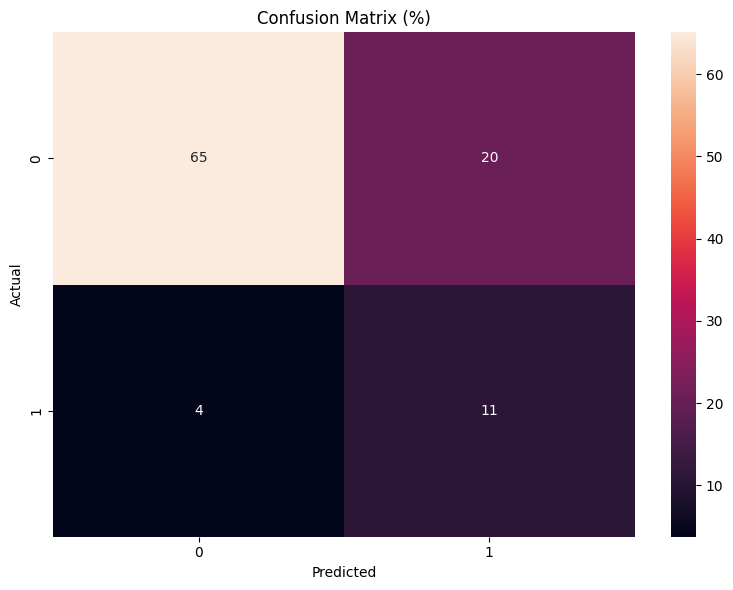

In [32]:
#compute confusion matrix
conf = confusion_matrix(y_test, y_pred)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.xlabel("Predicted") 
plt.ylabel("Actual")  
plt.title("Confusion Matrix (%)")
plt.tight_layout()
plt.show();

The model predicts non-churned customers well with 65% correctly identified but 20% are false alarms. For churned customers, 11% are correctly detected while 4% are missed. Overall, the model performs better at identifying non-churn than churn.

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       570
           1       0.35      0.74      0.47        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667



The logistic regression model achieved a recall score of 0.73 for those who churn. The model correctly identifies about 72% of customers who actually churned.

The classification report shows an accuracy of 76% with a precision of 0.35 and an F1-score of 0.47 for those who  churn indicating that while the model captures most churners (high recall) it still predicts some non churners incorrectly as churners (lower precision).

The model produced more true positives (correctly predicted churners) and true negatives (correctly predicted non-churners) than false predictions. This suggests the model is making correct predictions more often than incorrect ones and does not appear to be severely overfitting.



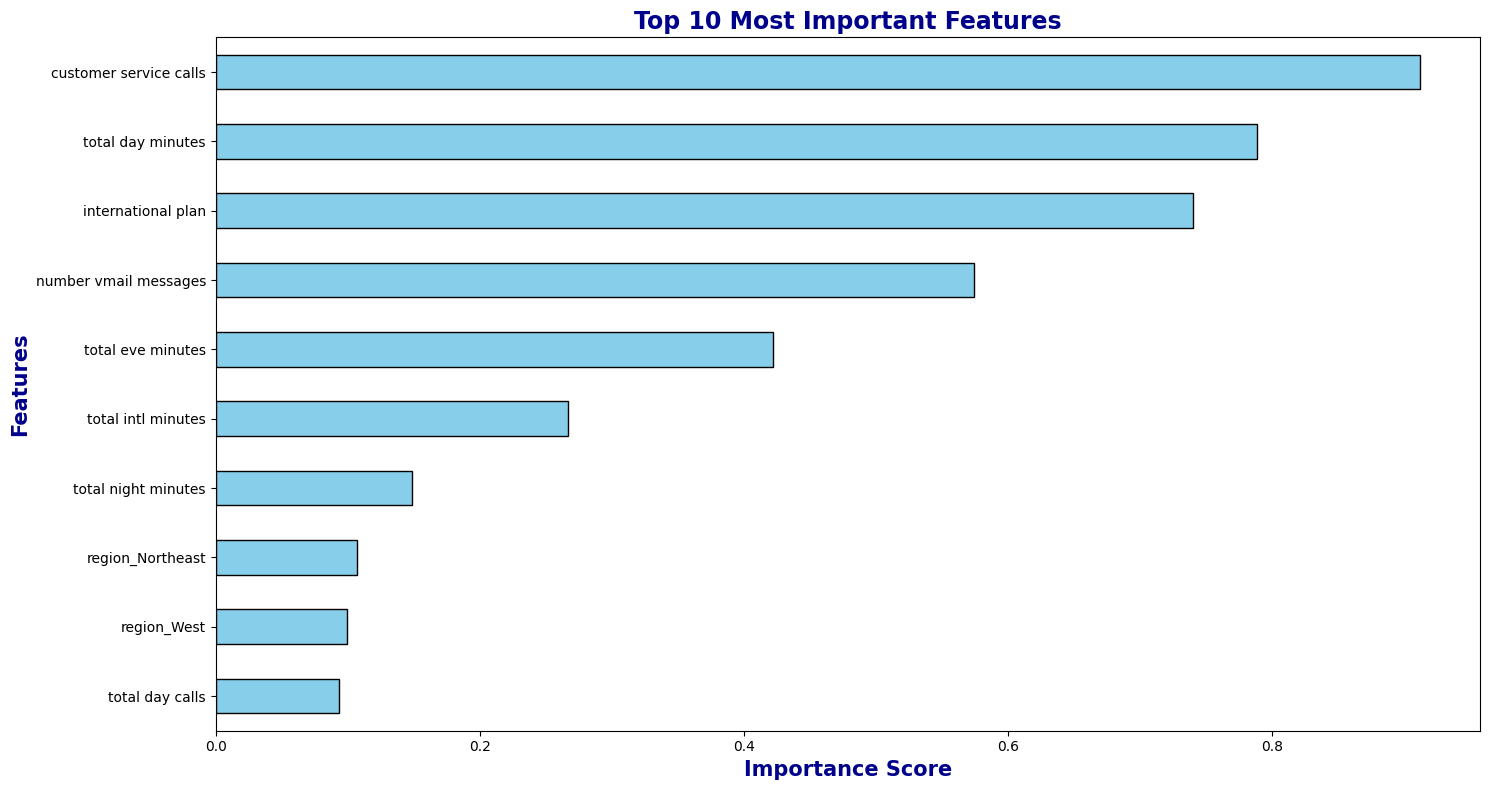

In [34]:
#recreate a dataFrame from X_train_sm with original feature names
X_train_sm_df = pd.DataFrame(X_train_sm, columns=X_train.columns)

#feature importance
importance = lr.coef_[0]

#match with the trained features
feature_names = X_train_sm_df.columns

#create a series for easy sorting and plotting
feature_importances = pd.Series(importance, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

#plot top 10 important features
plt.figure(figsize=(15,8))
top_features=feature_importances.head(10)
top_features.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Importance Score', fontsize=15, color='darkblue', fontweight='bold')
plt.ylabel('Features', fontsize=15, color='darkblue', fontweight='bold')
plt.title('Top 10 Most Important Features', fontsize=17, color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show(); 


Total Day Minutes, Customer Service Calls and Number of vmail messages are the top three most influential predictors of churn.

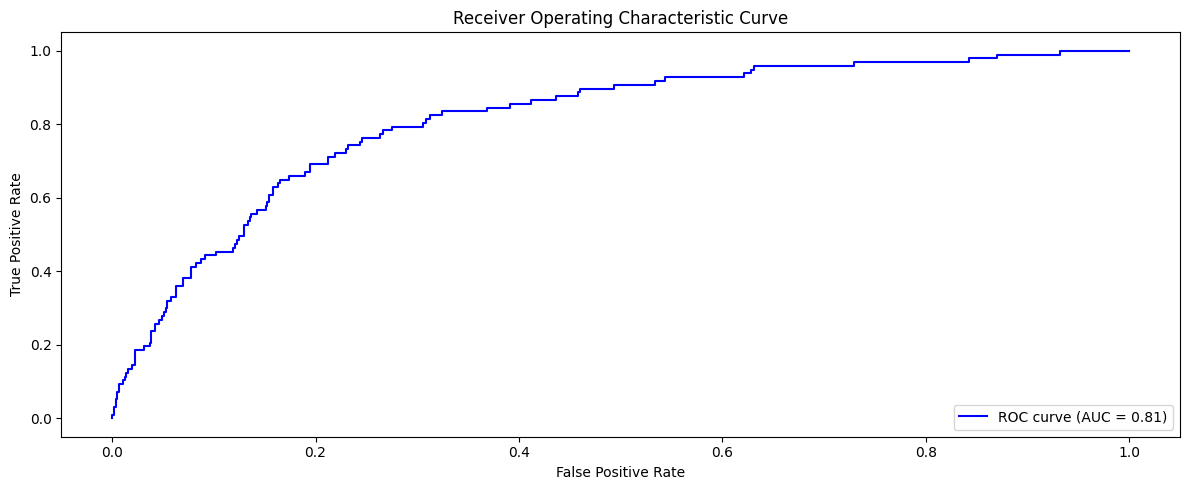

In [35]:
#predict probabilities for the positive class
y_pred_proba = lr.predict_proba(X_test_s)[:,1]

#compute ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

#compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

#plot
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show();

The Logistic Reression model has an AUC of 0.81 signifying that the model is capable of identifying at risk customers.

### Decision Tree

In [36]:
#instantiate DecisionTreeClassifier
tree = DecisionTreeClassifier()
#fit on the training data
tree.fit(X_train_sm, y_train_sm) 


DecisionTreeClassifier()

In [37]:
#generate predictions
y_pred1 = tree.predict(X_test_s)

#calculate accuracy on test data
print(f" The model  score on test data is {accuracy_score(y_test, y_pred1)*100:.2f}%")

 The model  score on test data is 86.81%


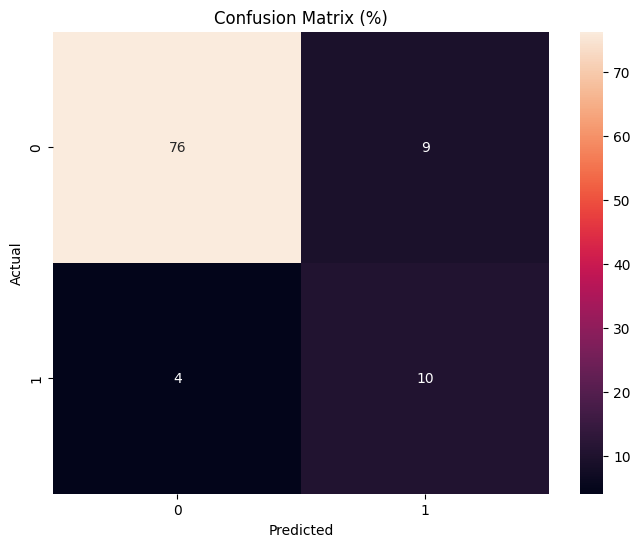

In [38]:
#compute confusion matrix
conf = confusion_matrix(y_test, y_pred1)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (%)")
plt.show();

The model predicts non-churned customers well with 77% correctly identified but 8% are false alarms. For churned customers, 10% are correctly detected while 4% are missed. Overall, the model performs better at identifying non-churn than churn.

In [39]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       570
           1       0.53      0.72      0.61        97

    accuracy                           0.87       667
   macro avg       0.74      0.81      0.77       667
weighted avg       0.89      0.87      0.88       667




**Class 0 (Non-churned customers)**: The model performs very well, with high precision (0.95) and recall (0.91) meaning most non-churned customers are correctly identifiedand few false alarms occur.

**Class 1 (Churned customers)**: Performance is lower with precision 0.57 and recall 0.72,  indicating the model catches most churned customers but also misclassifies some non-churned customers as churn.

Overall, the model has 88% accuracy, performing much better on the majority class (non-churn) than the minority class (churn). The F1-score shows a trade-off: good for non-churn (0.93) but moderate for churn (0.64).

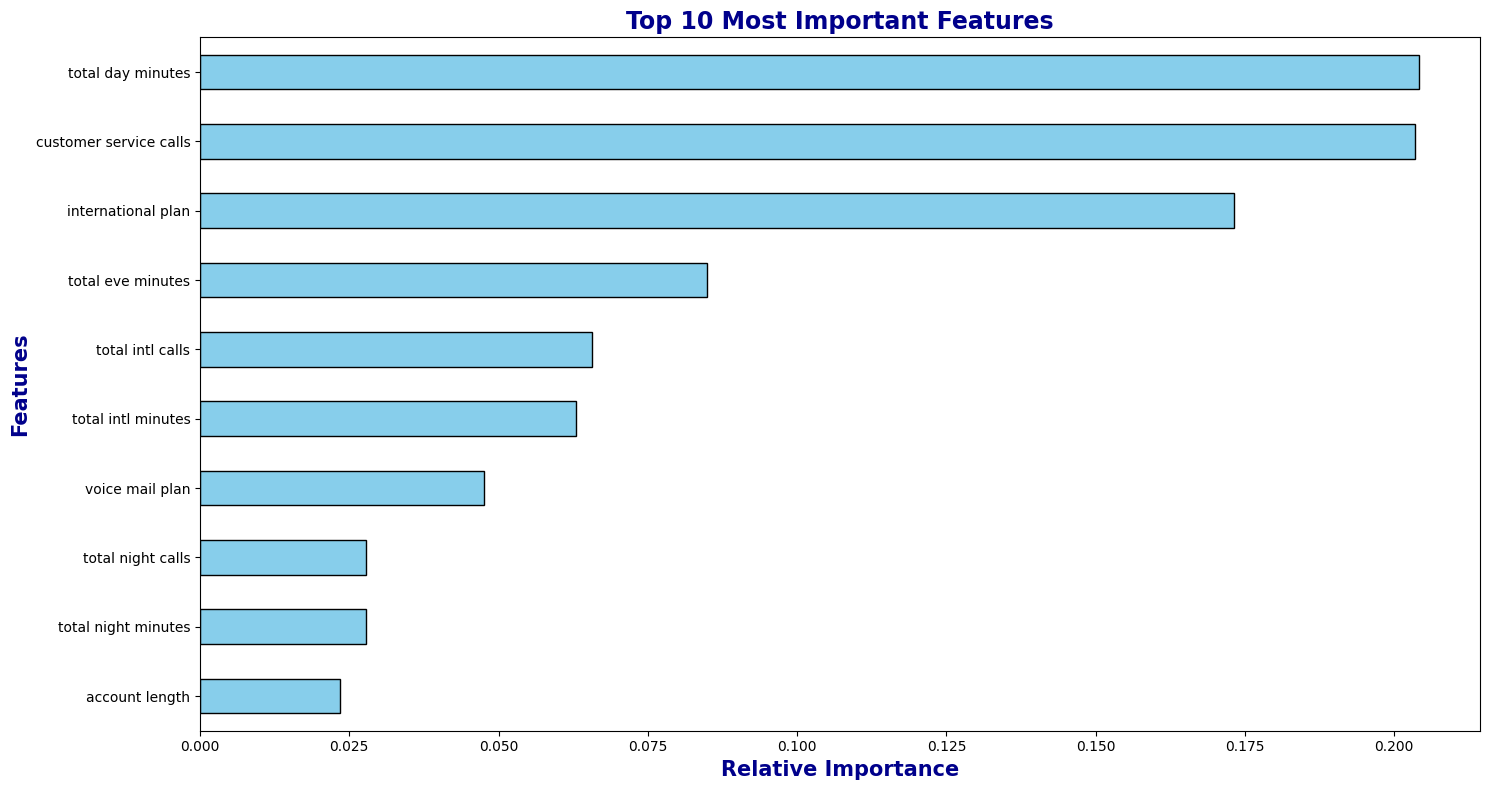

In [40]:
#create a dataFrame from the training set with original feature names
X_train_sm_df = pd.DataFrame(X_train_sm, columns=X_train.columns)

#get feature importances from the trained Decision Tree
importance = tree.feature_importances_

#match with feature names
feature_names = X_train_sm_df.columns

#create a series for easy sorting and plotting
feature_importances = pd.Series(importance, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(15,8))
top_features = feature_importances.head(10)
top_features.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Relative Importance', fontsize=15, color='darkblue', fontweight='bold')
plt.ylabel('Features', fontsize=15, color='darkblue', fontweight='bold')
plt.title('Top 10 Most Important Features', fontsize=17, color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show();


Total Day Minutes, Customer Service Calls and International Plan are the top three most influential predictors of churn.

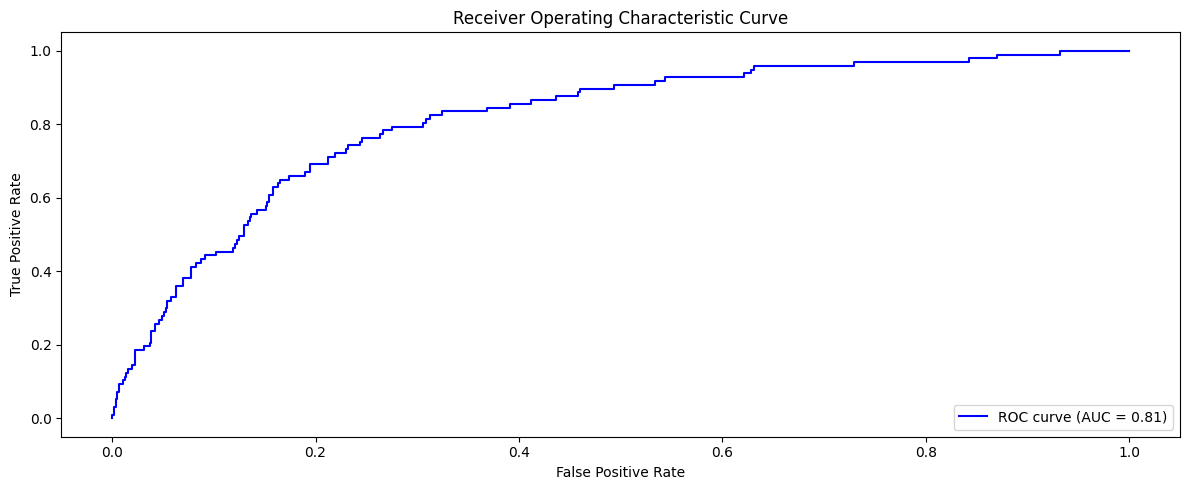

In [41]:
#predict probabilities for the positive class
y_pred_proba = lr.predict_proba(X_test_s)[:,1]

#compute ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

#compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

#plot
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show();

The Decision Tree model has an AUC of 0.81 signifying that the model is capable of identifying at risk customers.

### Random Forest

In [42]:
#instantiate RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
#fit on the training data
rf.fit(X_train_sm, y_train_sm) 


RandomForestClassifier(n_jobs=-1, random_state=42)

In [43]:
#generate predictions
y_pred2 = rf.predict(X_test_s)

#calculate accuracy on test data
print(f" The Random Forest model  score on test data is {accuracy_score(y_test, y_pred2)*100:.2f}%")

 The Random Forest model  score on test data is 90.55%


In [44]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       570
           1       0.67      0.70      0.68        97

    accuracy                           0.91       667
   macro avg       0.81      0.82      0.81       667
weighted avg       0.91      0.91      0.91       667



**Class 0 – Non-churned customers**

The model is highly accurate at predicting non-churned customers with very few false positives or false negatives.

**Class 1 – Churned customers**

The model correctly identifies about 68% of actual churners but 32% of predicted churners are actually non-churners showing some false positives.

**Overall performance**

91% of all predictions are correct.


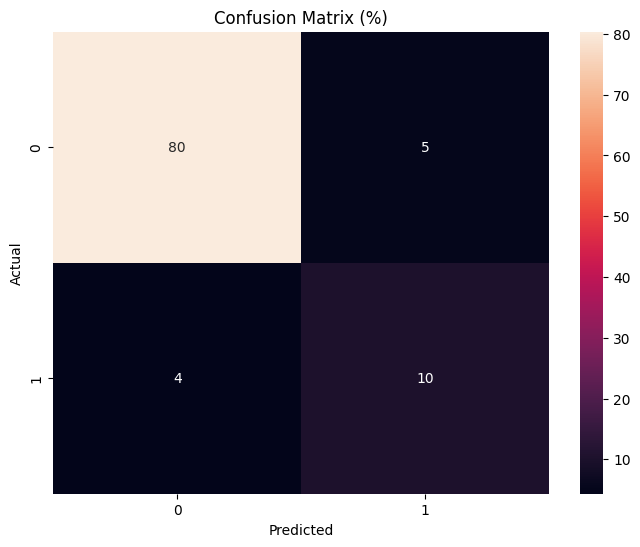

In [45]:
#compute confusion matrix
conf = confusion_matrix(y_test, y_pred2)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (%)")
plt.show();

The model predicts non-churned customers well with 81% correctly identified but 5% are false alarms. For churned customers, 10% are correctly detected while 4% are missed. Overall, the model performs better at identifying non-churn than churn.

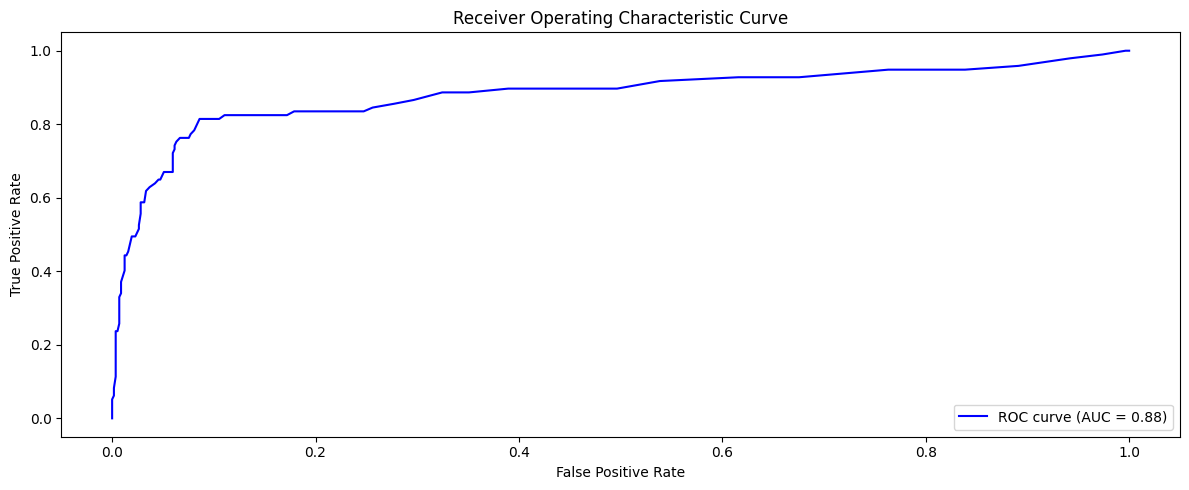

In [46]:
#predict probabilities for the positive class
y_pred_proba = rf.predict_proba(X_test_s)[:,1]

#compute ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

#compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

#plot
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show();

The Random Forest model has an AUC of 0.89 signifying that the model is capable of identifying at risk customers.

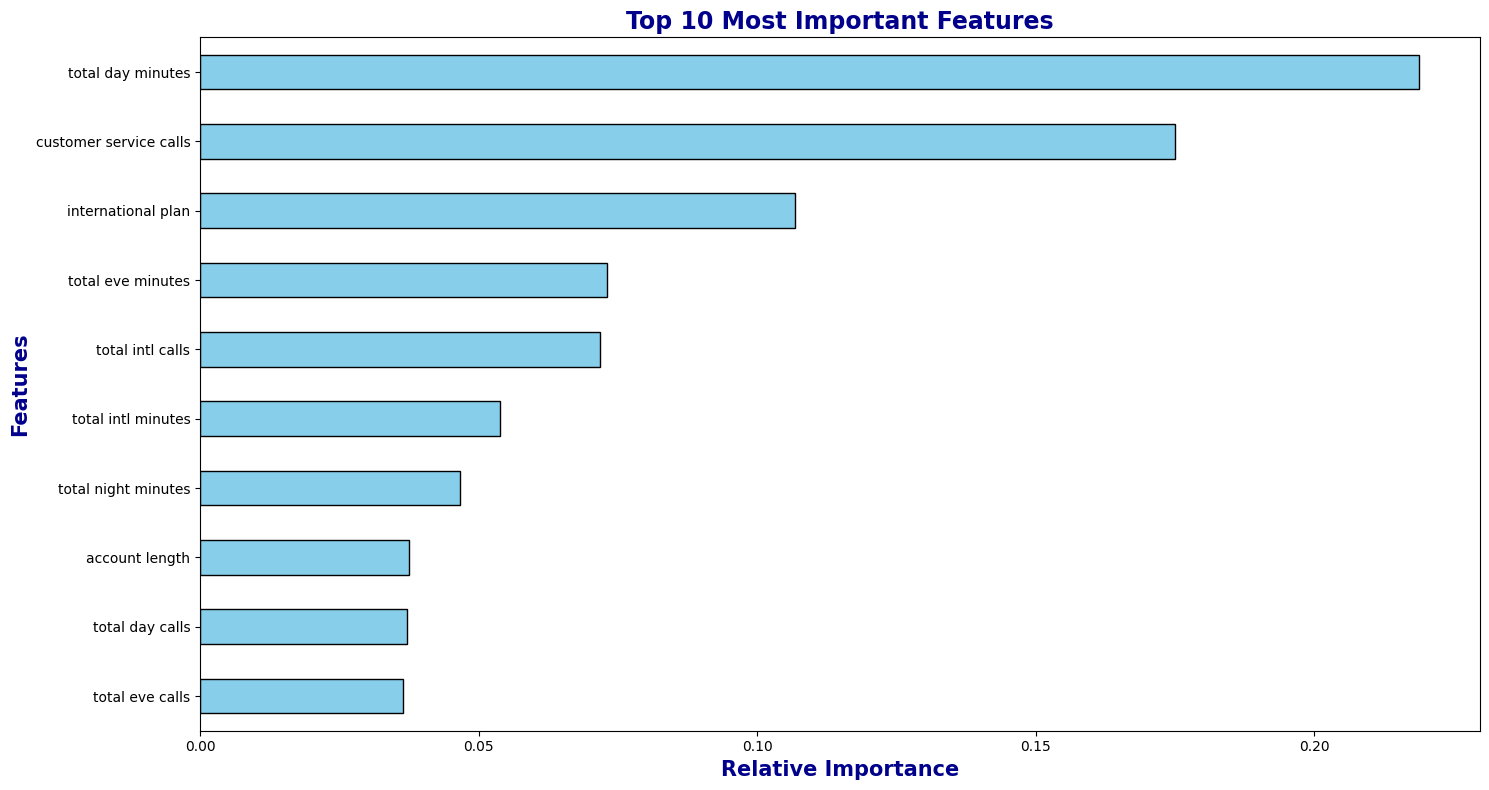

In [47]:
#create a dataFrame from the training set with original feature names
X_train_sm_df = pd.DataFrame(X_train_sm, columns=X_train.columns)

#get feature importances from the trained Decision Tree
importance = rf.feature_importances_

#match with feature names
feature_names = X_train_sm_df.columns

#create a series for easy sorting and plotting
feature_importances = pd.Series(importance, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(15,8))
top_features = feature_importances.head(10)
top_features.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Relative Importance', fontsize=15, color='darkblue', fontweight='bold')
plt.ylabel('Features', fontsize=15, color='darkblue', fontweight='bold')
plt.title('Top 10 Most Important Features', fontsize=17, color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show();


Total Day Minutes, Customer Service Calls and International Plan are the top three most influential predictors of churn.

### XGBoost

In [48]:
#instantiate XGBoostClassifier
xg = XGBClassifier(random_state=42,n_jobs=-1)
#fit on the training data
xg.fit(X_train_sm, y_train_sm) 


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [49]:
#generate predictions
y_pred3 = xg.predict(X_test_s)

#calculate accuracy on test data
print(f"The XGBoost model  score on test data is {accuracy_score(y_test, y_pred3)*100:.2f}%")

The XGBoost model  score on test data is 93.40%


In [50]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       570
           1       0.78      0.75      0.77        97

    accuracy                           0.93       667
   macro avg       0.87      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667



The XGBoost model demonstrates strong overall performance with an accuracy of 93%. For the non-churn class (0), it achieves very high precision (0.96), recall (0.96) and F1-score (0.96), showing it predicts non-churners very reliably.

For the churn class (1), the model attains a precision of 0.78, recall of 0.76, and F1-score of 0.77. This means it correctly identifies about 76% of customers who actually churn.

Overall, the model produces far more true positives and true negatives than false predictions, suggesting that it makes correct predictions much more often than incorrect ones and shows no obvious signs of overfitting.

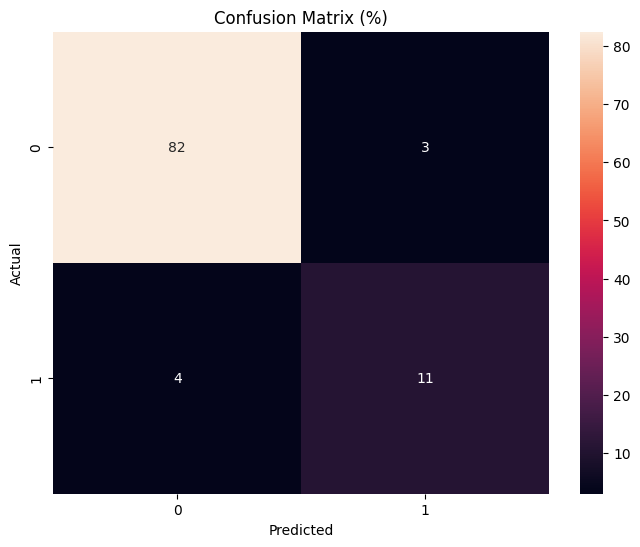

In [51]:
#compute confusion matrix
conf = confusion_matrix(y_test, y_pred3)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (%)")
plt.show();

The model predicts non-churned customers well with 82% correctly identified but 3% are false alarms. For churned customers, 11% are correctly detected while 3% are missed. Overall, the model performs better at identifying non-churn than churn.

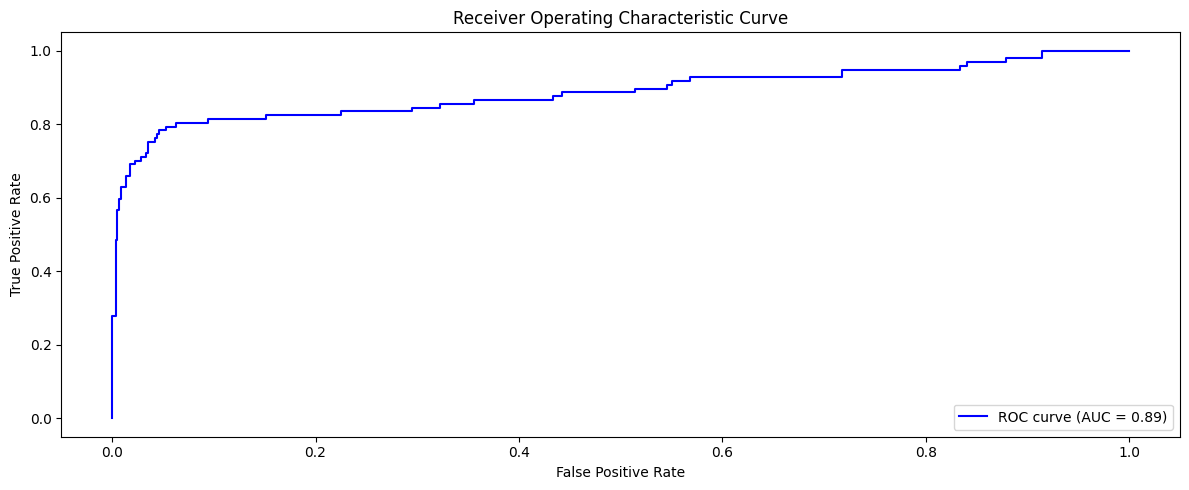

In [52]:
#predict probabilities for the positive class
y_pred_proba = xg.predict_proba(X_test_s)[:,1]

#compute ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

#compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

#plot
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show();

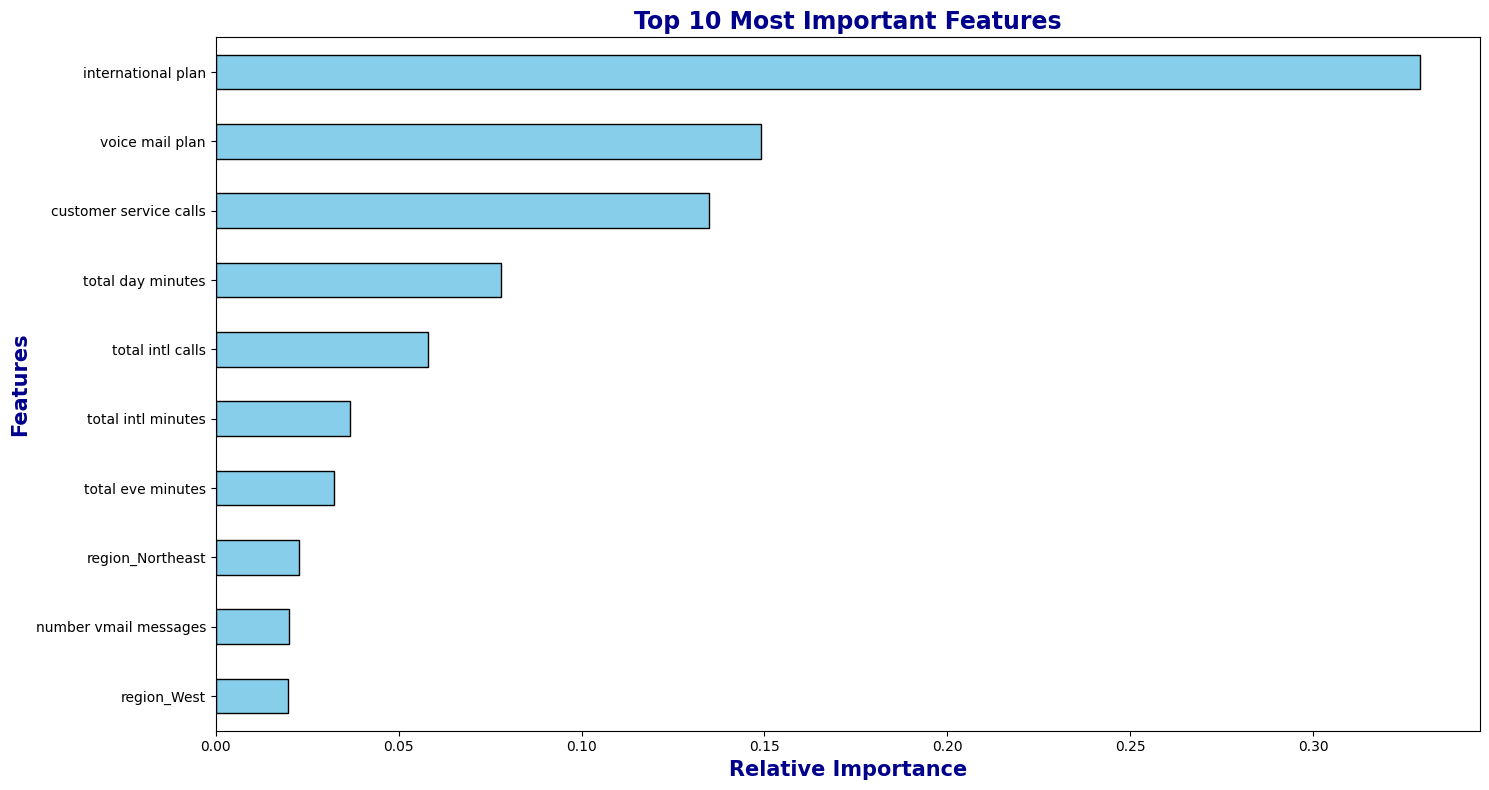

In [53]:
#create a dataFrame from the training set with original feature names
X_train_sm_df = pd.DataFrame(X_train_sm, columns=X_train.columns)

#get feature importances from the trained Decision Tree
importance = xg.feature_importances_

#match with feature names
feature_names = X_train_sm_df.columns

#create a series for easy sorting and plotting
feature_importances = pd.Series(importance, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(15,8))
top_features = feature_importances.head(10)
top_features.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Relative Importance', fontsize=15, color='darkblue', fontweight='bold')
plt.ylabel('Features', fontsize=15, color='darkblue', fontweight='bold')
plt.title('Top 10 Most Important Features', fontsize=17, color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show();


Voice Mail Plan, Customer Service Calls and International Plan are the top three most influential predictors of churn.

### Model Comparison - Recall Score      
We focus on the recall score. The recall score quantifies the proportion of actual positive instances that the model correctly detects. A higher recall means the model is more effective at capturing positive cases. 


In [54]:
#compute recall scores
recall_lr = recall_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred1)
recall_rf = recall_score(y_test, y_pred2)
recall_xgb = recall_score(y_test, y_pred3)

# isplay results
print(f"Recall (Logistic Regression): {recall_lr:.2f}")
print(f"Recall (Decision Tree): {recall_dt:.2f}")
print(f"Recall (Random Forest): {recall_rf:.2f}")
print(f"Recall (XGBoost): {recall_xgb:.2f}")


Recall (Logistic Regression): 0.74
Recall (Decision Tree): 0.72
Recall (Random Forest): 0.70
Recall (XGBoost): 0.75


The XGBoostClassifier has the highest recall score followed by DecisionTreeClassifier then Logistic Regression. The RandomForest has the lowest recall score of 0.68.  

### Model Comparison- ROC Curve  

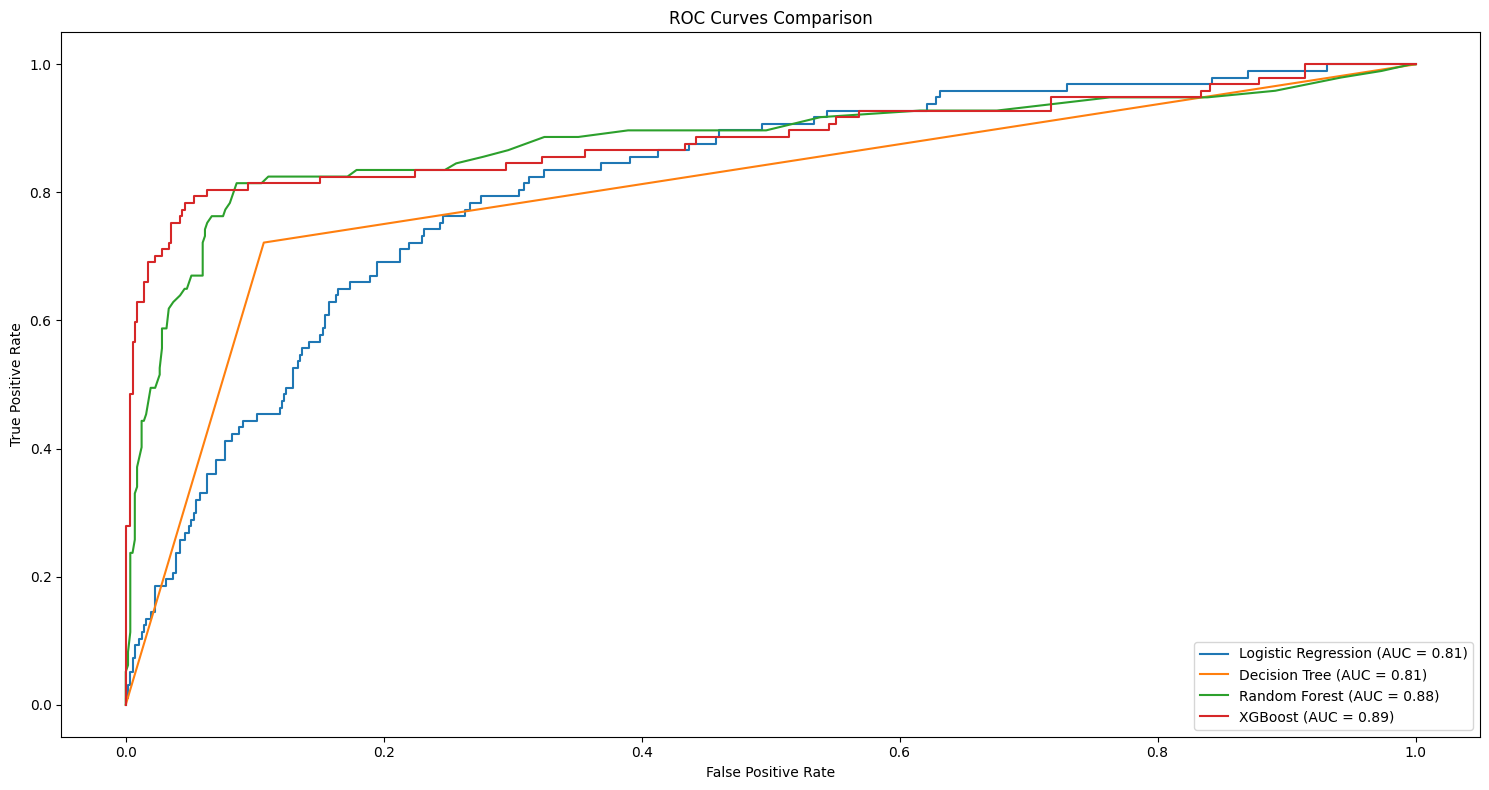

In [55]:
#dictionary to store models and labels
models = {"Logistic Regression": lr,
          "Decision Tree": tree,
          "Random Forest": rf,
           "XGBoost": xg}

plt.figure(figsize=(15,8))

#plot ROC curve for each model
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test_s)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

#plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show();


**Observation**:  

The ROC curve analysis shows that the XGBoost classifier has the best performance with the highest AUC score of 0.90 closely followed by the Random Forest classifier (AUC = 0.88). The Decision Tree classifier ranks third (AUC = 0.82) while the Logistic Regression has the lowest AUC score of 0.81.

The ROC curve is a graphical plot that shows the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for a binary classifier. The TPR is the proportion of positive instances that are correctly classified while the FPR is the proportion of negative instances that are incorrectly classified. The AUC is the area under the ROC curve and it is a measure of the overall performance of the classifier.

A higher AUC score indicates that the classifier is better at distinguishing between positive and negative instances. Based on the provided curve XGBoost demonstrates the strongest discriminative ability as its curve stays closest to the top-left corner throughout reflecting a superior balance of sensitivity and specificity compared to the others.

#### Hyperparameter Tuning  

To optimize the performance models, hyperparameter tuning is performed on the XGBoost and Decision Tree classifiers using scikit-learn's GridSearchCV with 5-fold cross-validation on the training dataset. This exhaustive search method systematically evaluates all combinations within the defined parameter grid, ensuring comprehensive exploration of the hyperparameter space while mitigating overfitting and promoting robust generalization—consistent with best practices for model optimization in classification tasks

#### Tuning DecisionTree Model 

In [56]:
#define hyperparameter grid
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 7, 8, 10],
              "min_samples_split":[2, 5, 8, 10]
              }

#Instantiate gridsearch
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, 10],
                         'min_samples_split': [2, 5, 8, 10]},
             scoring='accuracy', verbose=1)

In [57]:
#print best parameters
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

In [58]:
#recreate the tree model with the best params
tree_tuned = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_split=2)

#fit the tuned model on training data
tree_tuned.fit(X_train_sm, y_train_sm)


DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [59]:
#check accuracy on training data
print(f"The tuned Decision Tree model accuracy on training dataset is {tree_tuned.score(X_train_sm, y_train_sm)*100:.2f}%") 

The tuned Decision Tree model accuracy on training dataset is 96.27%


In [60]:
#generate predictions
y_pred_tuned = tree_tuned.predict(X_test_s)

#check accuracy on test data
print(f"The tuned model accuracy on the test data is {accuracy_score(y_test, y_pred_tuned)*100:.2f}%")

The tuned model accuracy on the test data is 90.85%


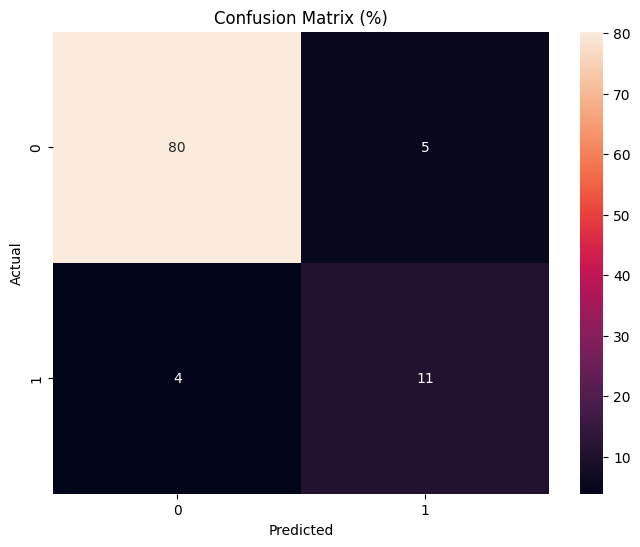

In [61]:
#compute confusion matrix
conf = confusion_matrix(y_test, y_pred_tuned)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (%)")
plt.show();

The tuned Decision Tree model predicts non-churned customers well with 79% correctly identified but 6% are false alarms. For churned customers, 10% are correctly detected while 4% are missed. Overall, the model performs better at identifying non-churn than churn.

In [62]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       570
           1       0.67      0.73      0.70        97

    accuracy                           0.91       667
   macro avg       0.81      0.84      0.82       667
weighted avg       0.91      0.91      0.91       667



The model is excellent at predicting the majority class (class 0).

Performance on the minority class (class 1) is moderate: recall is okay (detects most positives), but precision is lower (high false positives).

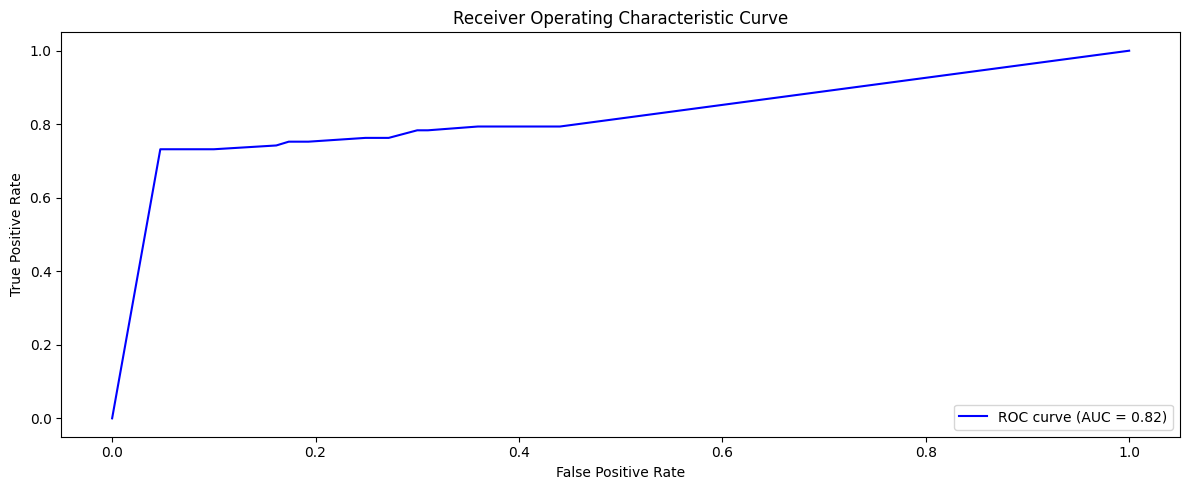

In [63]:
#predict probabilities for the positive class
y_pred_proba = tree_tuned.predict_proba(X_test_s)[:,1]

#compute ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

#compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

#plot
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show();

Based on the ROC curve and the recall metric, the tuned DecisionTreeClassifier model performs well in distinguishing between positive and negative classes (churned and non-churned customers) and in correctly identifying churned customers.The model has a recall score of 0.74, which means model is able to capture 74% of the actual churned customers. 

#### Tuning XGBoost Model

In [64]:
#define the hyperparameter grid
param_dist ={"max_depth": randint(1, 10),
             "learning_rate": uniform(0.01, 0.3),
             "n_estimators": randint(50, 300)}

#Instantiate the random search
random_search = RandomizedSearchCV(estimator=xg, param_distributions=param_dist, \
                                   n_iter=10, cv=5, scoring="recall", random_state=42)
random_search.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           num_parallel_tree=None, ...),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000214CD8AC3B0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000214D1C6C320>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000214D1813770>},
                   random_state=42, scoring='recall')

In [65]:
#print the best parameters
random_search.best_params_

{'learning_rate': 0.19033450352296263, 'max_depth': 8, 'n_estimators': 180}

In [66]:
#Instantiate the model 
xg_tuned = XGBClassifier(learning_rate=0.16427033152408354, max_depth=9, n_estimators=180)

#fit the tuned model o training data
xg_tuned.fit(X_train_sm, y_train_sm)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.16427033152408355, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, ...)

In [67]:
#generate predictions
y_pred_tuned1 = xg_tuned.predict(X_test_s)

#check accuracy on test data
print(f"The tuned XGBoost model accuracy on the test data is {accuracy_score(y_test, y_pred_tuned1)*100:.2f}%")

The tuned XGBoost model accuracy on the test data is 92.65%


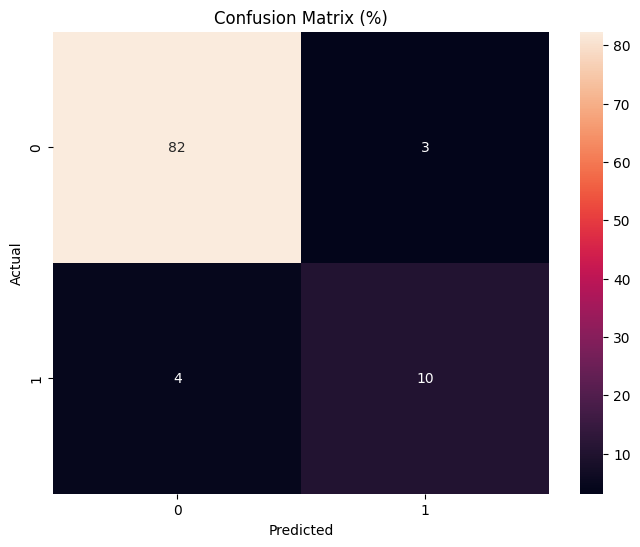

In [68]:
#compute confusion matrix
conf = confusion_matrix(y_test, y_pred_tuned1)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (%)")
plt.show();

The tuned XGBoost model predicts non-churned customers well with 83% correctly identified but 3% are false alarms. For churned customers, 11% are correctly detected while 4% are missed. Overall, the model performs better at identifying non-churn than churn.

In [69]:
print(classification_report(y_test, y_pred_tuned1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       570
           1       0.77      0.71      0.74        97

    accuracy                           0.93       667
   macro avg       0.86      0.84      0.85       667
weighted avg       0.92      0.93      0.93       667



**For non-churned customers (class 0)**: precision 0.96, recall 0.97, F1-score 0.96 — the model identifies them very reliably.

**For churned customers (class 1)**: precision 0.79, recall 0.73, F1-score 0.76 — the model is moderately good but misses some churn cases.

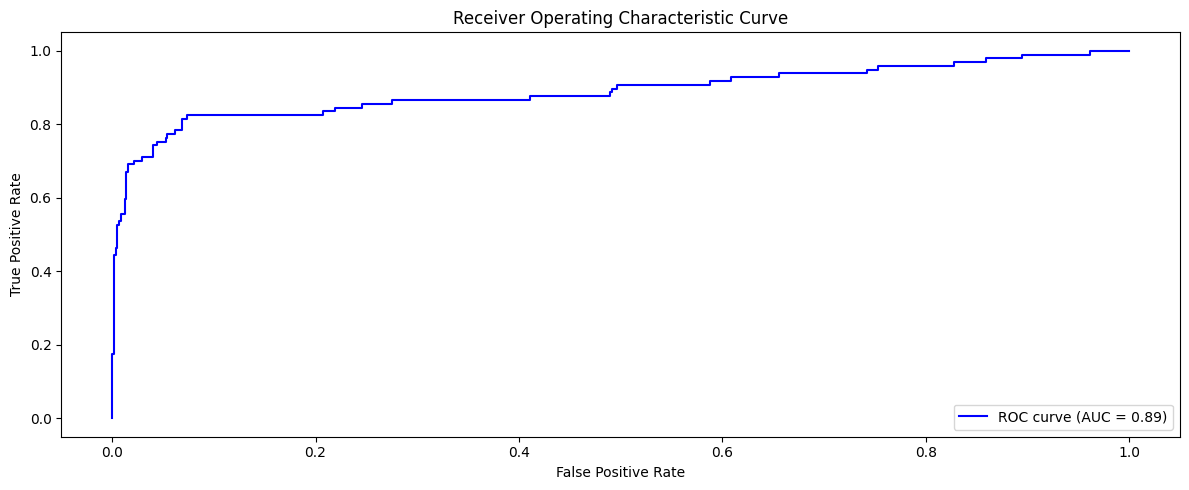

In [70]:
#predict probabilities for the positive class
y_pred_proba = xg_tuned.predict_proba(X_test_s)[:,1]

#compute ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

#compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

#plot
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show();

There is an improvement in the AUC Score(0.90) from the previous one of the tuned DecisionTree model which was 0.82. The model can correctly predict 90% of the time customers ar more likely to churn.

#### Cross Validation of Tuned Models  

This involves performing a 5-fold stratified cross-validation on both Decision Tree model and XGBoost model using a pipeline with SMOTE. This gives a more reliable estimate of performance.


In [71]:
#5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Decision Tree tuned pipeline with scaling and SMOTE
dt_pipeline = Pipeline([('scaler', StandardScaler()),           
                       ('smote', SMOTE()),       
                       ('clf', DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_split=2))])

#Cross-validation focusing on recall
dt_cv_scores = cross_val_score(dt_pipeline, X_train, y_train, cv=cv, scoring="recall")
print("Decision Tree recall scores per fold:", dt_cv_scores)

#XGBoost tuned pipeline with scaling and SMOTE
xg_pipeline = Pipeline([('scaler', StandardScaler()),           
                       ('smote', SMOTE(random_state=42)),     
                       ('clf', XGBClassifier(learning_rate=0.12236203565420874, max_depth=8, n_estimators=180))])

#Cross-validation focusing on recall
xg_cv_scores = cross_val_score(xg_pipeline, X_train, y_train, cv=cv, scoring="recall")
print("XGBoost recall scores per fold:", xg_cv_scores)


Decision Tree recall scores per fold: [0.78205128 0.77922078 0.72727273 0.77922078 0.79220779]
XGBoost recall scores per fold: [0.80769231 0.84415584 0.75324675 0.77922078 0.80519481]


In [72]:
# Mean recall scores 
print("Mean recall Decision Tree: {:.2f}%".format(dt_cv_scores.mean() * 100))
print("Mean recall XGBoost: {:.2f}%".format(xg_cv_scores.mean() * 100))


Mean recall Decision Tree: 77.20%
Mean recall XGBoost: 79.79%
